In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import sklearn.exceptions
from nltk import re
from skopt import BayesSearchCV
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
          

## Data exploration

In [695]:
df_train = pd.read_csv("erbB1_train.csv")
df_test = pd.read_csv("erbB1_test.csv")
ids=df_test.id

df = df_train

print(df_train.shape)
print(df_test.shape)

(5215, 1421)
(1738, 1420)


In [696]:
df_train

,id,NAME,Status,Regression target (pIC50_nM),Classification target,MW,AMW,Me,Mp,Mi,...,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_07,DLS_cons,LLS_01,LLS_02
0,1,Molecule 4948,Training,2.522879,active,350.23,10.301,0.999,0.770,1.100,...,0.75,0.83,0.83,0.3,0.0,0.83,1.0,0.65,0.67,0.88
1,2,Molecule 111,Training,2.221849,active,390.31,8.871,1.003,0.685,1.125,...,1.00,1.00,1.00,0.8,0.5,1.00,1.0,0.90,0.33,1.00
2,3,Molecule 1844,Training,2.096910,active,331.22,10.037,1.006,0.721,1.127,...,1.00,1.00,1.00,0.6,0.0,1.00,1.0,0.80,0.33,1.00
3,4,Molecule 4100,Training,2.000000,active,355.24,10.150,1.006,0.737,1.120,...,1.00,1.00,1.00,0.6,0.0,1.00,1.0,0.80,0.50,1.00
4,5,Molecule 453,Training,1.602060,active,362.25,9.533,1.010,0.700,1.123,...,1.00,1.00,1.00,0.6,0.0,1.00,1.0,0.80,0.33,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,5211,Molecule 1476,Training,-6.748188,nonactive,617.20,7.813,1.008,0.665,1.135,...,0.50,0.50,0.67,0.5,0.5,0.67,1.0,0.62,0.17,0.63
5211,5212,Molecule 1030,Training,-6.875061,nonactive,425.90,8.692,1.019,0.698,1.127,...,1.00,1.00,1.00,0.5,0.0,1.00,1.0,0.79,0.33,1.00
5212,5213,Molecule 6825,Training,-7.000000,nonactive,590.15,7.975,1.011,0.668,1.136,...,0.50,0.67,0.50,0.6,0.5,0.67,1.0,0.63,0.33,0.63
5213,5214,Molecule 1478,Training,-7.012837,nonactive,618.19,7.926,1.011,0.664,1.138,...,0.50,0.33,0.67,0.5,0.5,0.67,1.0,0.60,0.17,0.63


In [697]:
df_train.describe()

,id,Regression target (pIC50_nM),MW,AMW,Me,Mp,Mi,nBM,RBN,RBF,...,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_07,DLS_cons,LLS_01,LLS_02
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,...,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000
mean,2608.000000,-2.394943,446.310305,8.456707,1.011577,0.690017,1.126355,20.909300,6.450240,0.110068,...,0.869607,0.796065,0.878462,0.627229,0.323394,0.898314,0.926654,0.759971,0.285250,0.859360
std,1505.585158,1.385724,113.319137,1.091052,0.012861,0.033345,0.011024,5.051634,3.108967,0.035170,...,0.174398,0.220335,0.167177,0.168543,0.297782,0.159543,0.201260,0.120319,0.159637,0.152011
min,1.000000,-7.397940,130.160000,5.635000,0.974000,0.609000,1.088000,3.000000,0.000000,0.000000,...,0.250000,0.000000,0.000000,0.100000,0.000000,0.170000,0.000000,0.150000,0.000000,0.380000
25%,1304.500000,-3.462398,368.240000,7.695000,1.002000,0.666000,1.119000,18.000000,4.000000,0.086000,...,0.750000,0.670000,0.830000,0.500000,0.000000,0.830000,1.000000,0.720000,0.170000,0.750000
50%,2608.000000,-2.380211,443.950000,8.251000,1.010000,0.684000,1.127000,20.000000,6.000000,0.110000,...,1.000000,0.830000,1.000000,0.600000,0.500000,1.000000,1.000000,0.780000,0.330000,0.880000
75%,3911.500000,-1.395413,519.075000,8.985500,1.019000,0.711000,1.134000,24.000000,8.000000,0.133000,...,1.000000,1.000000,1.000000,0.800000,0.500000,1.000000,1.000000,0.840000,0.330000,1.000000
max,5215.000000,2.522879,1412.410000,16.336000,1.104000,0.859000,1.169000,54.000000,24.000000,0.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- No missing data

## Data preprocessing

In [698]:
df = df.drop_duplicates()
df = df.drop(columns=["id"], axis=1)
df = df.drop(columns=["NAME"], axis=1)
df = df.drop(columns=["Status"], axis=1)
df = df.drop(columns=["B03[S-Br]"], axis=1)
df = df.drop(columns=["nR=CHX"], axis=1)
df.shape

(5215, 1416)

### Label encoding the classification target feature

In [699]:
df["Classification target"]=df["Classification target"].apply(lambda x:0 if x=="nonactive" else 1)

In [700]:
df

,Regression target (pIC50_nM),Classification target,MW,AMW,Me,Mp,Mi,nBM,RBN,RBF,...,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_07,DLS_cons,LLS_01,LLS_02
0,2.522879,1,350.23,10.301,0.999,0.770,1.100,22,2,0.054,...,0.75,0.83,0.83,0.3,0.0,0.83,1.0,0.65,0.67,0.88
1,2.221849,1,390.31,8.871,1.003,0.685,1.125,17,6,0.130,...,1.00,1.00,1.00,0.8,0.5,1.00,1.0,0.90,0.33,1.00
2,2.096910,1,331.22,10.037,1.006,0.721,1.127,17,3,0.086,...,1.00,1.00,1.00,0.6,0.0,1.00,1.0,0.80,0.33,1.00
3,2.000000,1,355.24,10.150,1.006,0.737,1.120,21,2,0.053,...,1.00,1.00,1.00,0.6,0.0,1.00,1.0,0.80,0.50,1.00
4,1.602060,1,362.25,9.533,1.010,0.700,1.123,17,4,0.100,...,1.00,1.00,1.00,0.6,0.0,1.00,1.0,0.80,0.33,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,-6.748188,0,617.20,7.813,1.008,0.665,1.135,25,8,0.095,...,0.50,0.50,0.67,0.5,0.5,0.67,1.0,0.62,0.17,0.63
5211,-6.875061,0,425.90,8.692,1.019,0.698,1.127,20,6,0.118,...,1.00,1.00,1.00,0.5,0.0,1.00,1.0,0.79,0.33,1.00
5212,-7.000000,0,590.15,7.975,1.011,0.668,1.136,25,9,0.115,...,0.50,0.67,0.50,0.6,0.5,0.67,1.0,0.63,0.33,0.63
5213,-7.012837,0,618.19,7.926,1.011,0.664,1.138,25,7,0.084,...,0.50,0.33,0.67,0.5,0.5,0.67,1.0,0.60,0.17,0.63


#### HAndling missing values

In [ ]:
def fill_Nan(x, col):
  if( pd.isnull(x) ):return df[col].mean()
  return x



# df.satisfied=df.satisfied.apply(fill_Nan)



for col in df.columns:
    num_missing = df[col].isnull().sum()
    if num_missing != 0:
      print(col, num_missing)


In [ ]:
Y=df["Regression target (pIC50_nM)"].values
df=df.drop("Regression target (pIC50_nM)", axis=1)

In [ ]:
X=df.values


### Since we have many columns, we'll try to select only the K best ones

In [702]:
from sklearn.feature_selection import SelectKBest, f_regression
n=200

In [703]:
train = df.apply(pd.to_numeric).astype('float32')
kb = SelectKBest(score_func=f_regression, k=n)
kb.fit(train, Y)
indices = np.argsort(kb.scores_)[::-1]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

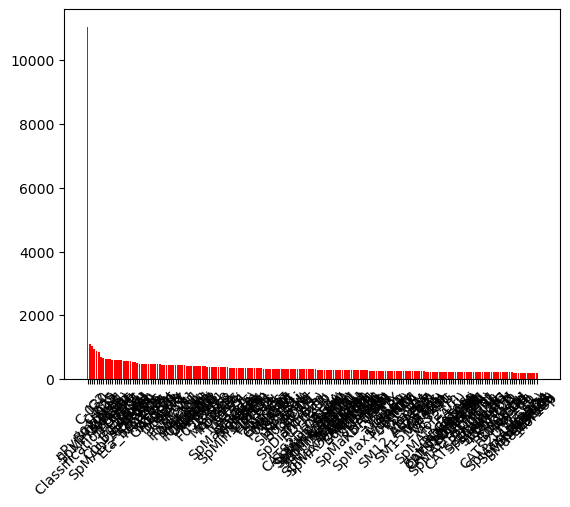

In [704]:

selected_features = []
for i in range(n):
  selected_features.append(train.columns[indices[i]])
plt.figure()
plt.bar(selected_features, kb.scores_[indices[range(n)]], color='r', align='center')
plt.xticks(rotation=45)

In [705]:
df = df[selected_features]
df.describe()

,Classification target,nPyrimidines,C-030,SpMin1_Bh(p),IC2,B02[N-N],C-029,H-049,JGI5,Mor15m,...,nR=Cp,Dp,SM08_EA(bo),SpDiam_A,RDF070u,Mor23u,Mor02s,D/Dtr06,Mor04u,Mor18p
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,...,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000
mean,0.476510,0.672291,0.545350,2.102417,4.687497,0.811697,0.780249,1.031448,0.022604,1.873982,...,0.126558,0.367251,12.547708,4.864942,26.033760,-1.336805,138.520563,336.107839,3.588871,-1.385801
std,0.499496,0.482320,0.499909,0.055957,0.443831,0.390991,0.635264,0.745893,0.004781,0.726349,...,0.333661,0.044922,0.398974,0.103272,14.185745,0.543479,44.405582,203.629422,3.165501,0.375368
min,0.000000,0.000000,0.000000,1.805000,2.950000,0.000000,0.000000,0.000000,0.000000,-1.794000,...,0.000000,0.230000,8.800000,3.939000,0.068000,-7.198000,-14.369000,0.000000,-6.667000,-3.263000
25%,0.000000,0.000000,0.000000,2.054000,4.388000,1.000000,0.000000,1.000000,0.019000,1.376000,...,0.000000,0.334000,12.368000,4.819000,15.487500,-1.633000,106.099000,191.145000,1.347000,-1.627000
50%,0.000000,1.000000,1.000000,2.105000,4.734000,1.000000,1.000000,1.000000,0.022000,1.899000,...,0.000000,0.365000,12.578000,4.872000,23.821000,-1.290000,134.988000,294.235000,3.008000,-1.347000
75%,1.000000,1.000000,1.000000,2.155000,5.044000,1.000000,1.000000,1.000000,0.025000,2.351000,...,0.000000,0.397000,12.776000,4.917000,34.041000,-0.997500,167.664000,432.050000,5.250000,-1.134500
max,1.000000,2.000000,2.000000,2.213000,5.577000,1.000000,4.000000,5.000000,0.050000,9.999000,...,2.000000,0.552000,13.924000,5.426000,110.803000,0.205000,359.677000,2468.012000,26.294000,-0.007000


### Standerdization

In [ ]:
df=(df - df.mean()) / df.std()

X = df.values
df.describe()


### Data splitting

In [706]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# # Define the models

# reg2 = Ridge(random_state=42)
# reg3 = LinearRegression()
# reg4 = DecisionTreeRegressor(random_state=42)
# reg6 = SVR(max_iter=10000000,tol=0.000001)
# reg7 = GradientBoostingRegressor(random_state=42)





# param_grid6 = {
#     'C': [0.01,0.1, 1.0, 10.0],
#     'kernel': ['rbf'],
#     'gamma': ['scale', 'auto'],
#     'epsilon':[0.1,0.01]
# }





In [ ]:
%%time
# Train the grid search model
#gs = RandomizedSearchCV(SVR(), param_grid6, cv=3, n_jobs=8, n_iter=20, scoring='r2',verbose=10).fit(X_train, y_train)


- we'll use the Grid search result to train the model

In [ ]:
regressor=GradientBoostingRegressor(n_estimators=350,max_depth=7,verbose=True)

regressor.fit(X_train,y_train)






### Evaluation

In [ ]:
# model evaluation:
from sklearn.metrics import r2_score
r2_score(y_test,regressor.predict(X_test))

# Submission

In [ ]:
# test data preporcessed 



df_test=pd.read_csv("test.csv")
df_test=df_test[selected_features]

predictions=regressor.predict(df_test.values)
print(len(predictions))
sub=pd.DataFrame({
  'id':ids,
  'Regression target (pIC50_nM)':predictions
})

sub.to_csv('submission.csv',index=False)
